In [25]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [57]:
centroids=[(-2,-2),(5,5)]
cluster_std=[1,1]
X,y=make_blobs(n_samples=100,cluster_std=cluster_std,centers=centroids,n_features=2,random_state=2)


In [58]:
X.shape

(100, 2)

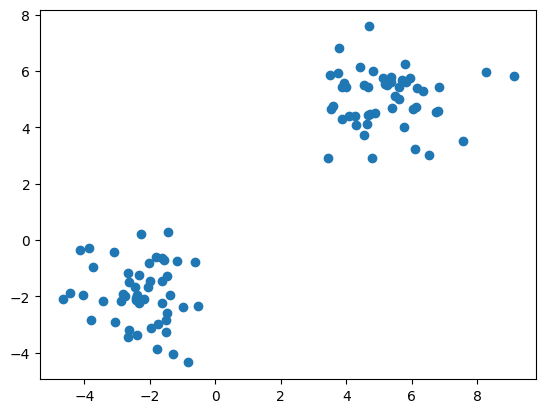

In [59]:
plt.scatter(X[:,0],X[:,1])

In [60]:
import numpy as np
import random

class Kmeans:
    def __init__(self, n_clusters=2, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit_predict(self, X):
        random_index = random.sample(range(0, X.shape[0]), self.n_clusters)
        self.centroids = X[random_index]
        
        for i in range(self.max_iter):
            # Assign clusters
            cluster_group = self.assign_clusters(X)
            old_centroids = self.centroids
         
            # Update/move centroids
            self.centroids = self.move_centroids(X, cluster_group)
            
            # Checking for convergence (if centroids move or not)
            if np.array_equal(old_centroids, self.centroids):
                break

        return cluster_group

    def assign_clusters(self, X):
        cluster_group = []
        distances = []
        for row in X:
          
            for centroid in self.centroids: 
                ''' Example calculating Euclidean distances between two arrays
                a = np.array([1, 2])
                b = np.array([4, 5])
                np.sqrt(np.dot(b - a, b - a))
                '''
                distances.append(np.sqrt(np.dot(row - centroid, row - centroid)))
            
            # Calculating minimum distance
            min_distance = min(distances)
            # Index position returns which distance is smallest (0 for centroid 1 and 1 for centroid 2)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()
        
        return np.array(cluster_group)

    def move_centroids(self, X, cluster_group):
        new_centroids = []
        # checking number of unique clusters
        cluster_types = np.unique(cluster_group)
       
        
        for type in cluster_types:
            if X[cluster_group == type].size==0:
                new_centroids.append(self.centroids[type])
            else:
               new_centroids.append(X[cluster_group == type].mean(axis=0))  # Changed axis=1 to axis=0 to calculate mean of each cluster
        
        return np.array(new_centroids)


In [61]:
km=Kmeans(n_clusters=2,max_iter=100)
y_means=km.fit_predict(X)
# km.assign_clusters(X)


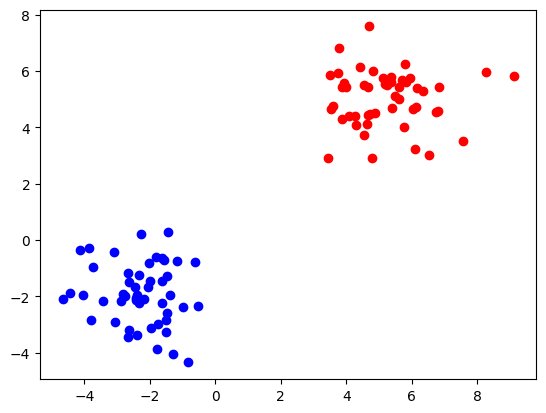

In [62]:
plt.scatter(X[y_means==0,0],X[y_means==0,1],color='red')
plt.scatter(X[y_means==1,0],X[y_means==1,1],color='blue')
plt.show()

In [31]:
X.shape[0]

100

In [7]:
#  Example calculating euclidean distances between two arrays
# a=np.array([1,2])
# b=np.array([4,5])
# np.sqrt(np.dot(b-a,b-a))



In [8]:
#  # Checking cluster type and mean example
# X=np.array([[1,2],[2,3],[3,4],[4,5],[5,6]])
# cluster_group=np.array([0,1,1,0,0])
# a=np.unique(cluster_group)
# for type in a:
#     print(type)
    
  
    
                       
                       

0
1


In [9]:
# X[cluster_group==0].mean(axis=1)

array([1.5, 4.5, 5.5])

In [36]:
print(kmeans.centroids)

[[ 5.22657056  5.02991175]
 [-5.29781951 -4.90966276]]
